### Decision Tree

Decision Tree is one of the most fundamental algorithms for classification and regression in the Machine Learning world.

- It can perform both classification and regression analysis (mostly for classfication)
- It is very powerful and works great with complex datasets
- **When coupled with ensemble techniques, it performs even better**
- This algorithm works by dividing the whole dataset into a **tree-like structure** based on some rules and conditions and then gives prediction based on those conditions

Let’s understand the approach to decision tree with a basic scenario. 

*Scenario*

Suppose it’s Friday night and you are not able to decide if you should go out or stay at home

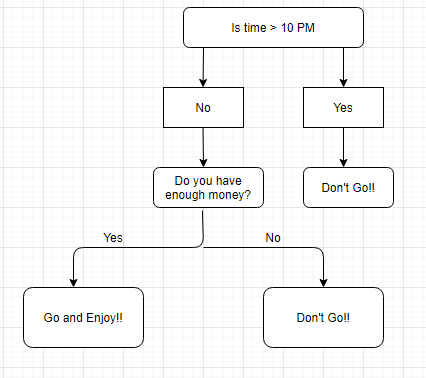

Although we may or may not use the decision tree for such decisions, this was a basic example to help you understand how a decision tree makes a decision. So how did it work?

- It selects a **root node** based on a given condition, e.g. our root node was chosen as **time >10 pm**.
- Then, the root node was split into **child notes** based on the given condition. The right child node in the above figure fulfilled the condition, so no more questions were asked.
- The **left child node** didn’t fulfil the condition, so again it was split based on a new condition.
- This process continues till all the conditions are met or if you have predefined the depth of your tree, e.g. the depth of our tree is 3, and it reached there when all the conditions were exhausted.



### Classification Trees

- Let’s see how the parent nodes and condition is chosen for the splitting to work.

In classification tree, splitting is done using  **entropy** or **Gini impurity**. Let’s understand these terms in detail.

## Entropy

Entropy is the measure of randomness in the data. In other words, it gives the **impurity** present in the dataset.

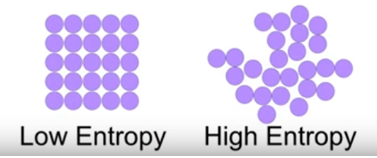

- When we split our nodes into two regions and put different observations in both the regions, the **main goal is to reduce the entropy** i.e. reduce the randomness in the region and divide our data cleanly than it was in the previous node

- If splitting the node doesn’t lead into entropy reduction, we try to split based on a different condition, or we stop

- A region is clean (low entropy) when it contains data with the same labels and random if there is a mixture of labels present (high entropy).



### Information Gain

Information gain calculates the decrease in entropy after splitting a node.

- It is the difference between entropies before and after the split. 
- The more the information gain, the more entropy is removed.

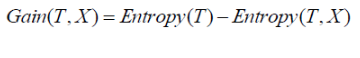




# Lets try to understand this using an example :

We will try and find the root nodes for the same dataset by calculating entropy and information gain.

DataSet:

<img src='data_class.PNG' width="200">

We have two features and we will try to choose the root node by calculating the information gain by splitting each feature.

Let' review the formula for entropy and information gain:
- Where,  P and Q are the probaibilies of an event happening or not resp
<img src='example/formula_entropy.PNG' width="300">

<img src='example/inform_gain.PNG' width="300">


Let's start with feature "class" :

<img src='example/9.PNG' width="500">

<img src='example/10.1.PNG' width="500">

<img src='example/11.PNG' width="500">

<img src='example/12.PNG' width="500">

Information is basically the entropy of that class.
Hence, Total information Gain = Entropy - Information as stated above. 


<img src='example/13.PNG' width="500">


Let' see the information gain from feature "gender" :

<img src='example/10.2.PNG' width="500">

<img src='example/14.PNG' width="500">

<img src='example/15.PNG' width="500">

<img src='example/16.PNG' width="500">






### Gini Impurity

- The Gini impurity measure is another method used in decision tree algorithms to decide split from a root node.

- Ginni impurity value lies between 0 and 1, 0 being no impurity and 1 denoting random distribution.

- The node for which the Ginni impurity is least is selected as the root node to split.



Numeric example :

We will use a simple dataset which contains information about students of different classes and gender and see whether they stay in school's hostel or not.

This is how our data set looks like :


<img src='data_class.PNG' width="200">

Let's review the formula for calculating ginni impurity:

<img src='example/gini.PNG' width="200">

Let's start with class, we will try to gini impurity for all different values in "class". 

<img src='example/1.PNG' width="500">

<img src='example/2.PNG' width="500">

<img src='example/3.1.PNG' width="500">

<img src='example/3.PNG' width="500">

<img src='example/4.PNG' width="500">

<img src='example/5.PNG' width="500">

<img src='example/6.PNG' width="500">

<img src='example/7.PNG' width="500">

<img src='example/8.PNG' width="500">

### Implementation in Python
- we will use Sklearn module to implement decision tree algorithm.
- By default it uses Gini impurity as a criteria to split the nodes.

In [1]:
import pandas as pd
#import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

In [2]:
data = pd.read_csv("winequality_red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

599 rows × 12 columns

The data set consists following **Input variables** : 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide

7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol

and the **Output variable** gives the quality of th wine based on the input variables:

12 - quality (score between 3 and 8)

In [3]:
X = data.drop(columns = 'quality')
y = data['quality']

In [4]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [5]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [6]:
# Dividing into testing set and training set

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [7]:
# Giving training data to the decision tree
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
# accuracy of our trained model
clf.score(x_train,y_train)

1.0

In [9]:
# Lets give the testing data

py_pred = clf.predict(x_test)

In [10]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6354166666666666

In [11]:
x_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
693            9.0              0.48         0.32             2.8      0.084   
160            7.6              0.95         0.03             2.0      0.090   
612            7.5              0.64         0.00             2.4      0.077   
604            8.3              0.58         0.13             2.9      0.096   
376           11.5              0.45         0.50             3.0      0.078   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
693                 21.0                 122.0   0.9984  3.32       0.62   
160                  7.0                  20.0   0.9959  3.20       0.56   
612                 18.0                  29.0   0.9965  3.32       0.60   
604                 14.0                  63.0   0.9984  3.17       0.62   
376                 19.0                  47.0   1.0003  3.26       1.11   

     alcohol  
693      9.4  
160      9.6  
612     10.0  
604      9.1  
376     11.0

In [12]:
# Giving some data to our model to check :

input_data = [['8.0','0.48','0.32','2.8','0.084','21.0','122.0','0.9984','3.32','0.62','9.4']]
py_pred2 = clf.predict(input_data)

In [13]:
py_pred2

array([5], dtype=int64)